In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv(r"D:\DOCUMENTS\ML Notebooks\Vehicle Insurance Claim Fraud Detection\fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.shape

(15420, 33)

In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


EDA


In [8]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [9]:
#create a new copy of a dataframe data and assign it
data=df.copy(deep=True)

In [10]:
#creating a new column 'Status' which isn't encoded
data.loc[data['FraudFound_P']==0,'Status']='No Fraud'
data.loc[data['FraudFound_P']==1,'Status']='Fraud'

In [11]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Status
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No Fraud
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No Fraud
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No Fraud
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No Fraud
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No Fraud


In [12]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_countplots(data, hue='Status'):
    """
    Create count plots with the x-axis being 'FraudFound_P' and hues being object variables.

    Parameters:
        data (DataFrame): The pandas DataFrame containing the data.
        hue (str): The name of the column to use as hue (default is 'FraudFound_P').

    Returns:
        None
    """
    sns.set_theme(color_codes=True)  # Set the Seaborn theme

    # Get the object columns excluding 'status'
    object_columns = data.select_dtypes(include='object').columns.tolist()
    object_columns = [col for col in object_columns if col != 'status']

    # Create count plots for each object column
    for column in object_columns:
        plt.figure(figsize=(7,4))  # Create a new figure for each count plot
        sns.countplot(data=data, x=hue, hue=column)

        # Set the title and labels
        plt.title(f'Count Plot: {column} by {hue}')
        plt.xlabel(hue)
        plt.ylabel('Count')

        # Display the plot
        plt.show()


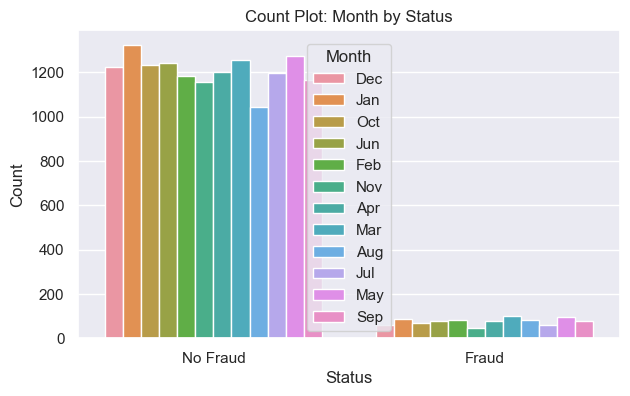

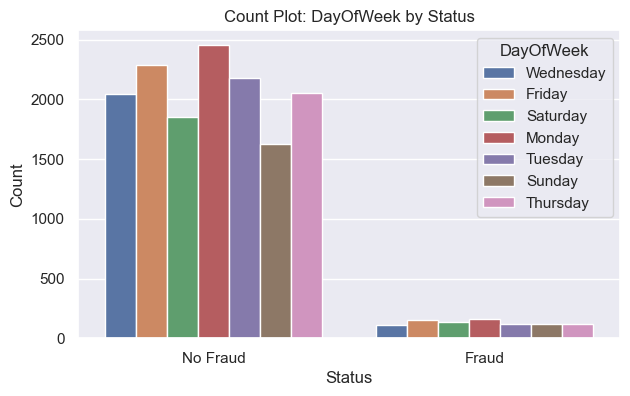

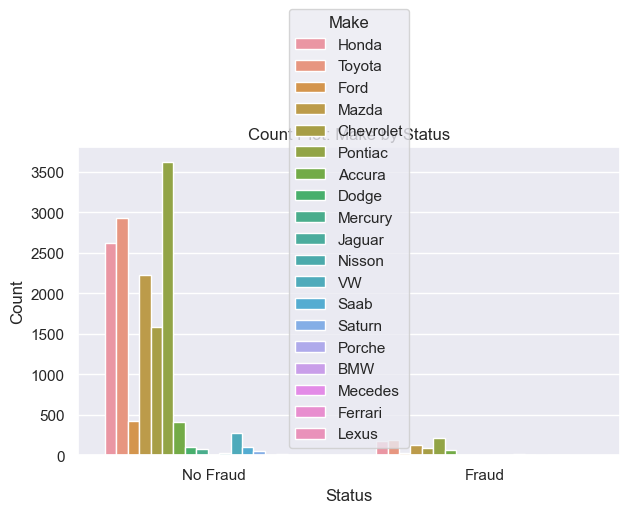

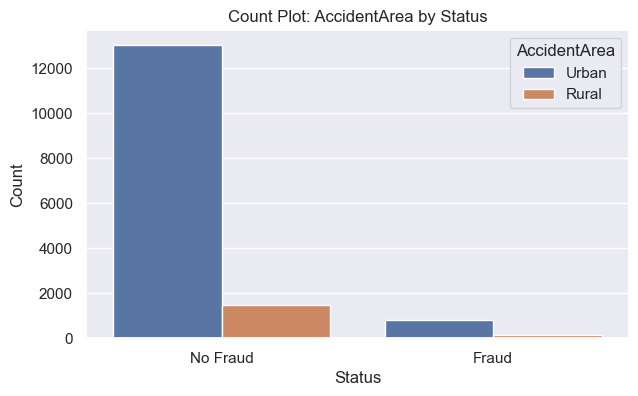

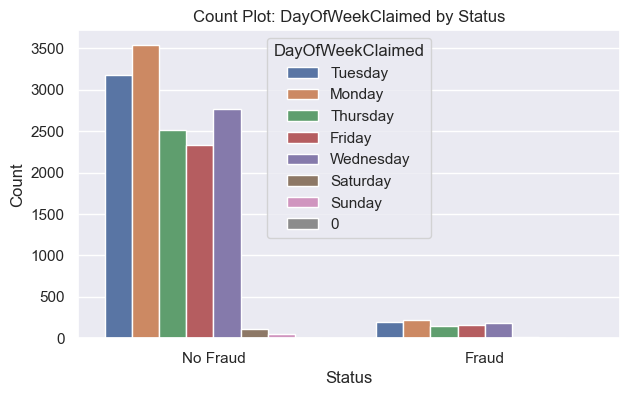

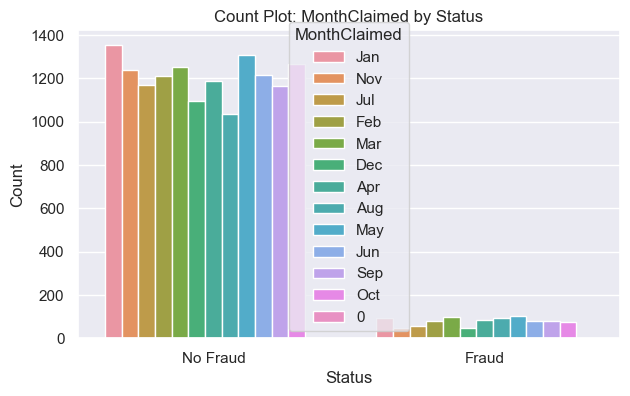

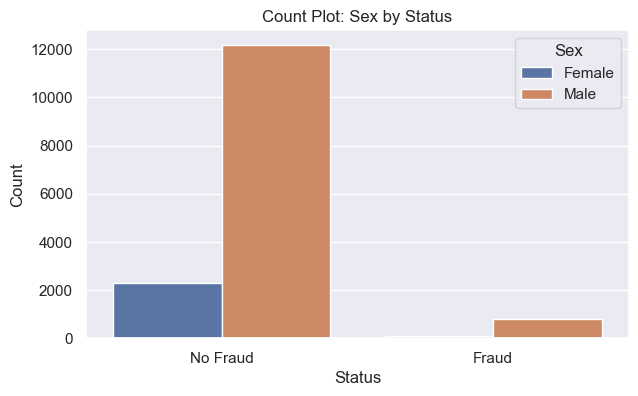

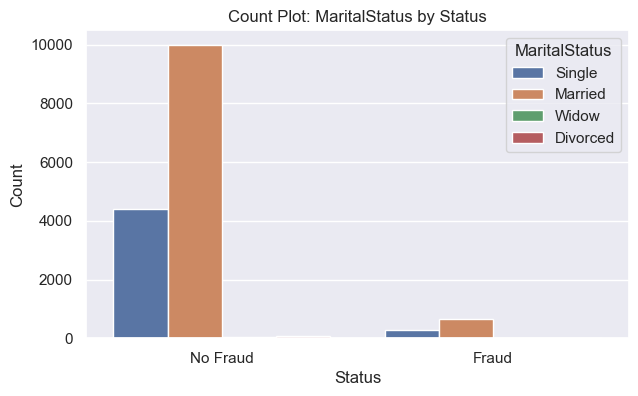

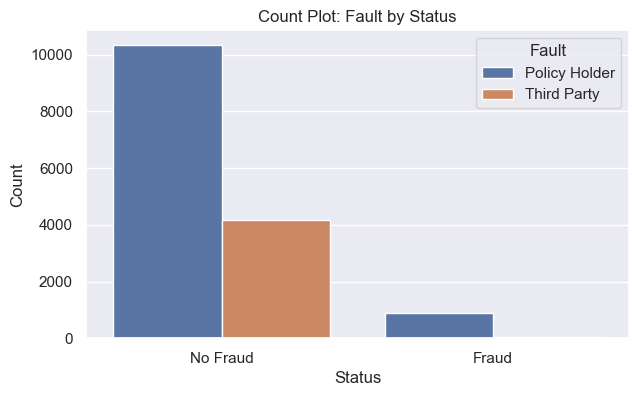

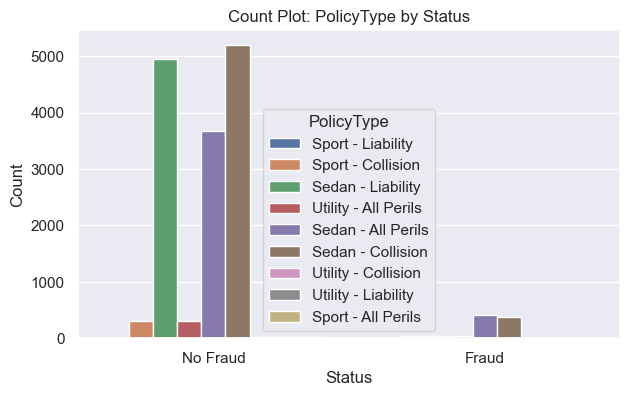

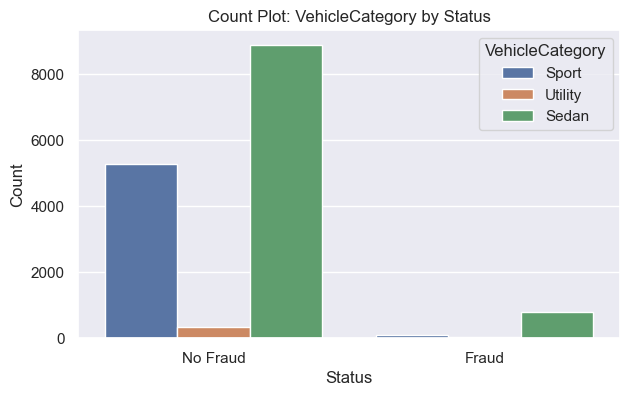

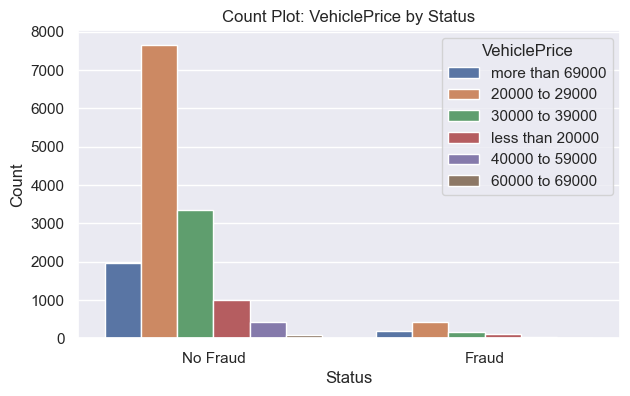

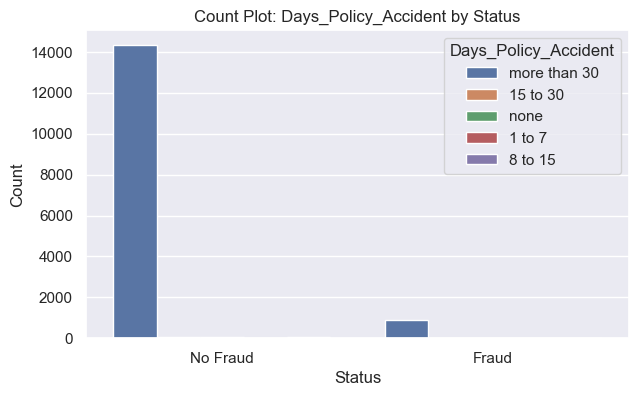

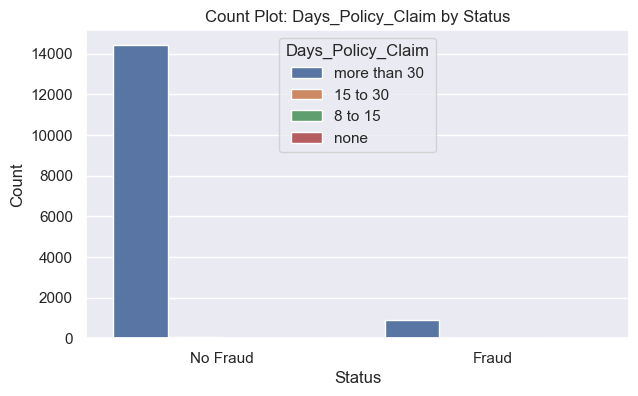

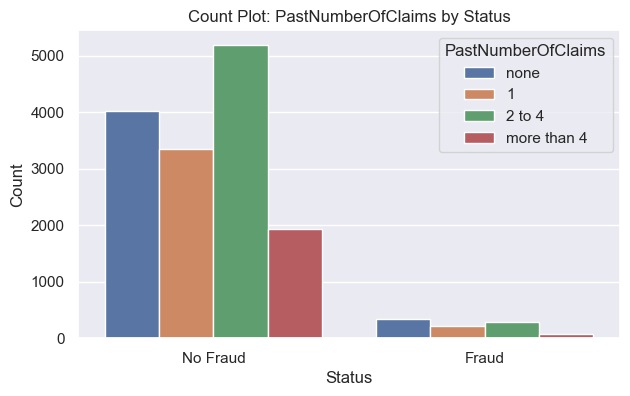

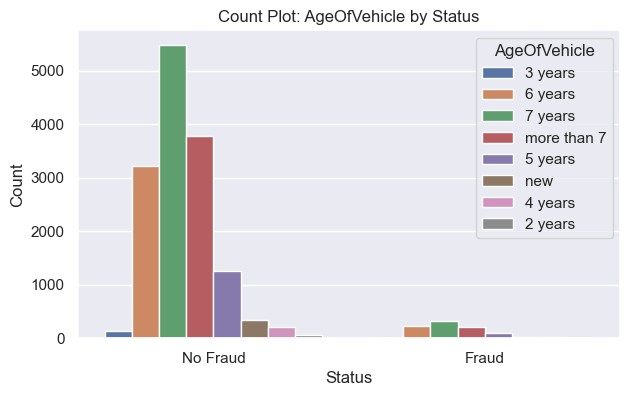

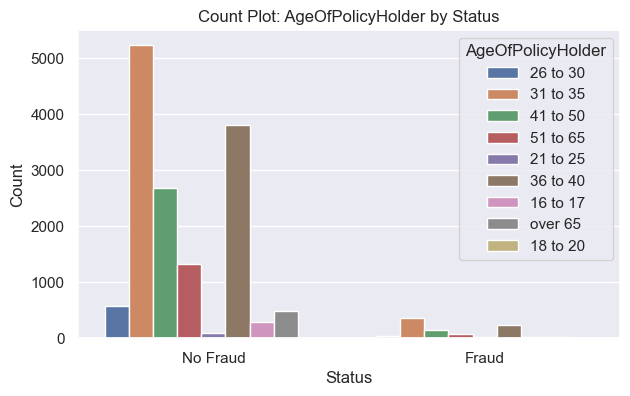

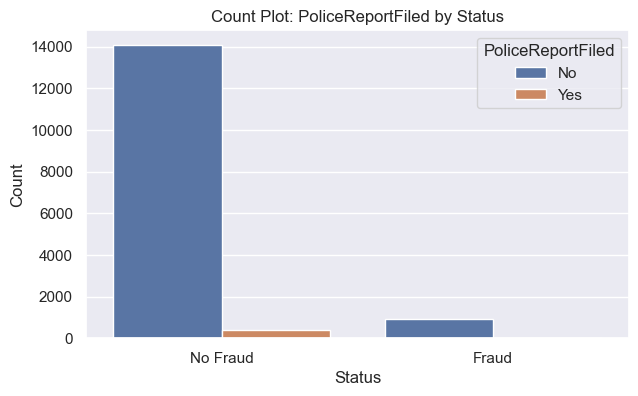

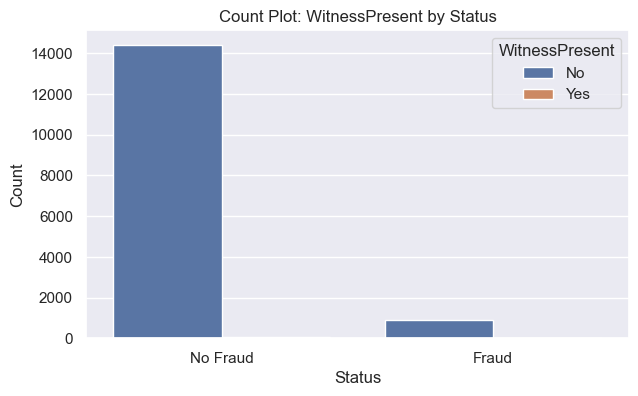

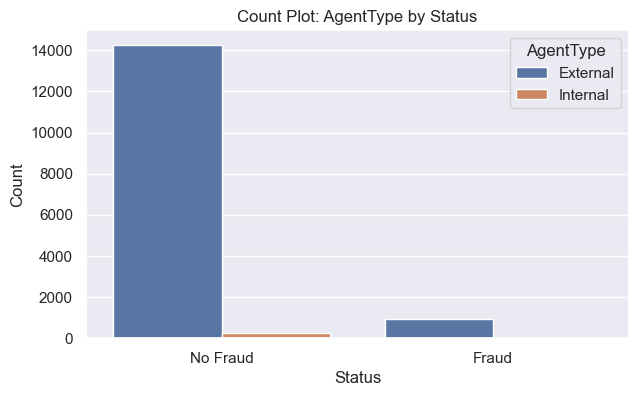

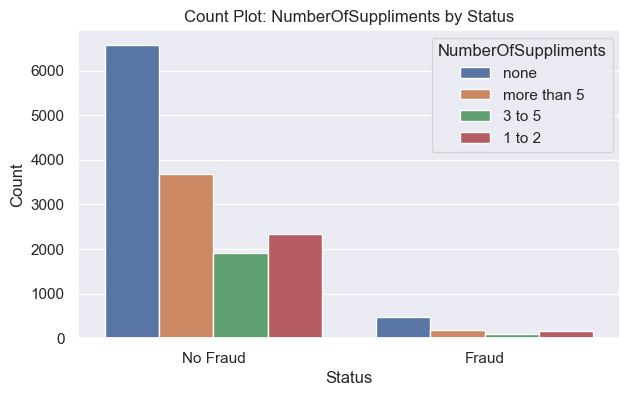

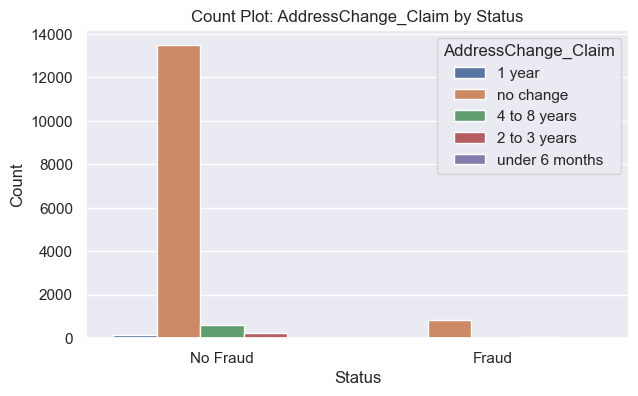

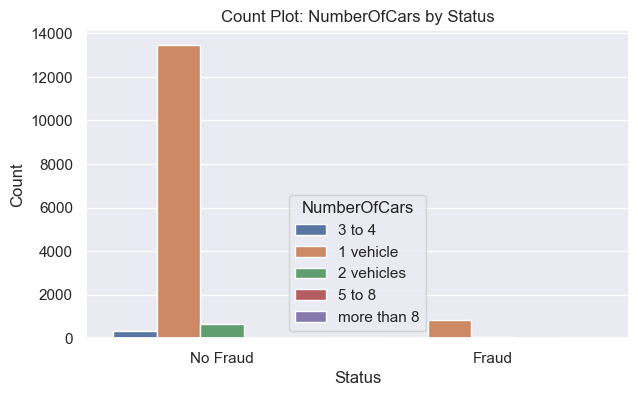

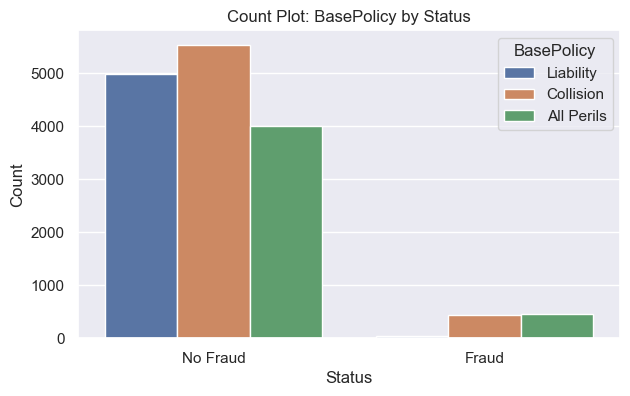

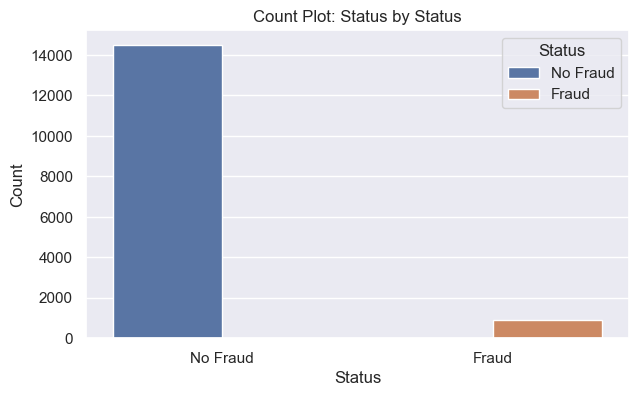

In [14]:
create_countplots(data)

Data Processing

In [15]:
print(df.apply(lambda col: col.unique()))

Month                   [Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...
WeekOfMonth                                               [5, 3, 2, 4, 1]
DayOfWeek               [Wednesday, Friday, Saturday, Monday, Tuesday,...
Make                    [Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...
AccidentArea                                               [Urban, Rural]
DayOfWeekClaimed        [Tuesday, Monday, Thursday, Friday, Wednesday,...
MonthClaimed            [Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...
WeekOfMonthClaimed                                        [1, 4, 2, 3, 5]
Sex                                                        [Female, Male]
MaritalStatus                          [Single, Married, Widow, Divorced]
Age                     [21, 34, 47, 65, 27, 20, 36, 0, 30, 42, 71, 52...
Fault                                        [Policy Holder, Third Party]
PolicyType              [Sport - Liability, Sport - Collision, Sedan -...
VehicleCategory                       

In [16]:
df.select_dtypes(include='object').nunique()

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

In [17]:
df.drop(columns=['MonthClaimed','Month'],inplace=True)
df.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,Wednesday,Honda,Urban,Tuesday,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,3,Wednesday,Honda,Urban,Monday,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,5,Friday,Honda,Urban,Thursday,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,2,Saturday,Toyota,Rural,Friday,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,5,Monday,Honda,Urban,Tuesday,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [18]:
df['FraudFound_P'].unique()

array([0, 1], dtype=int64)

Label Encoding Object variables

In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical(df):

    # Create a new DataFrame to store the encoded variables
    newdf = df.copy()

    # Get the categorical columns
    categorical_columns = newdf.select_dtypes(include='object').columns

    # Apply label encoding to each categorical column
    for column in categorical_columns:
        le = LabelEncoder()
        newdf[column] = le.fit_transform(newdf[column])

    return newdf


In [20]:
# Label encode categorical variables
newdf = label_encode_categorical(df)

# Print the encoded data
print(newdf)

       WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0                5          6     6             1                 6   
1                3          6     6             1                 2   
2                5          0     6             1                 5   
3                2          2    17             0                 1   
4                5          1     6             1                 6   
...            ...        ...   ...           ...               ...   
15415            4          0    17             1                 6   
15416            5          4    13             1                 1   
15417            5          4    17             0                 1   
15418            1          1    17             1                 5   
15419            2          6    17             1                 5   

       WeekOfMonthClaimed  Sex  MaritalStatus  Age  Fault  PolicyType  \
0                       1    0              2   21      0           5   
1

In [21]:
newdf.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,6,6,1,6,1,0,2,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
1,3,6,6,1,2,4,1,2,34,0,4,1,5,0,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1
2,5,0,6,1,5,2,1,1,47,0,4,1,5,0,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1
3,2,2,17,0,1,1,1,1,65,1,2,1,0,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2
4,5,1,6,1,6,2,0,2,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1


Feature Scaling

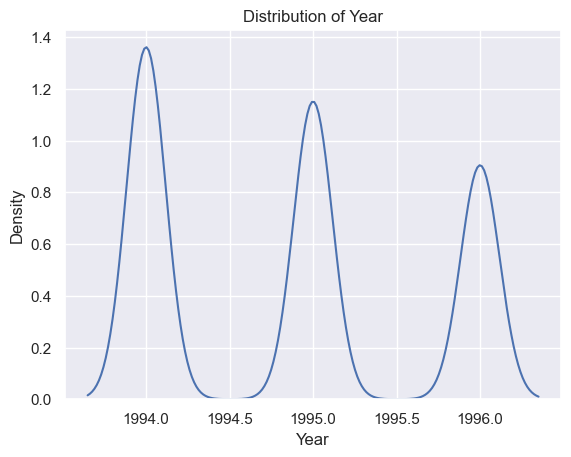

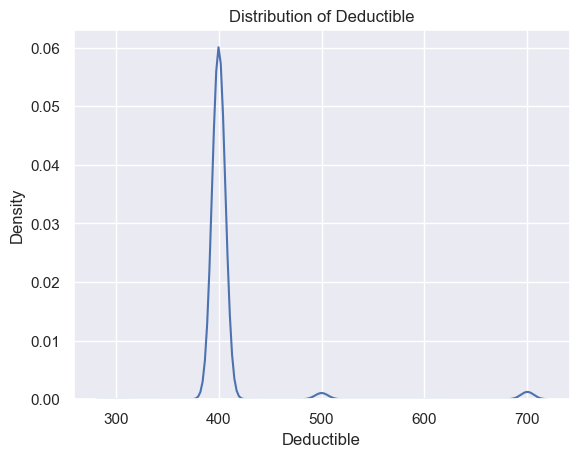

In [22]:
# KDE plot for 'Year'
sns.kdeplot(newdf['Year'])
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

# KDE plot for 'Deductible'
sns.kdeplot(newdf['Deductible'])
plt.title('Distribution of Deductible')
plt.xlabel('Deductible')
plt.ylabel('Density')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standardization to the 'Deductible' column
newdf['Deductible'] = scaler.fit_transform(newdf[['Deductible']])
# Apply standardization to the 'Age' column
newdf['Age'] = scaler.fit_transform(newdf[['Age']])
# Apply standardization to the 'Year' column
newdf['Year'] = scaler.fit_transform(newdf[['Year']])
# Apply standardization to the 'RepNumber' column
newdf['RepNumber'] = scaler.fit_transform(newdf[['RepNumber']])
# Apply standardization to the 'Make' column
newdf['Make'] = scaler.fit_transform(newdf[['Make']])
# Apply standardization to the 'AgeOfPolicyHolder' column
newdf['AgeOfPolicyHolder'] = scaler.fit_transform(newdf[['AgeOfPolicyHolder']])




In [24]:
newdf.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,6,-0.778873,1,6,1,0,2,-1.397554,0,5,1,5,0,1,0.764540,-2.450633,1,3,2,3,1,-1.355359,0,0,0,3,0,2,-1.078658,2
1,3,6,-0.778873,1,2,4,1,2,-0.434015,0,4,1,5,0,2,1.416743,-0.175298,4,3,2,3,4,-0.638956,1,0,0,3,3,0,-1.078658,1
2,5,0,-0.778873,1,5,2,1,1,0.529523,0,4,1,5,0,3,-0.322464,-0.175298,3,3,2,0,5,0.793851,0,0,0,3,3,0,-1.078658,1
3,2,2,1.303376,0,1,1,1,1,1.863653,1,2,1,0,0,4,-0.974666,-0.175298,2,3,2,0,6,1.510255,1,0,0,2,3,0,-1.078658,2
4,5,1,-0.778873,1,6,2,0,2,-0.952844,1,4,1,5,0,5,-1.192067,-0.175298,1,3,2,3,3,-0.638956,0,0,0,3,3,0,-1.078658,1


Correlation

In [36]:
colors=['#97C1A9','#FFFFFF']

Text(0.5, 1.0, 'Fraud_Found Correlation')

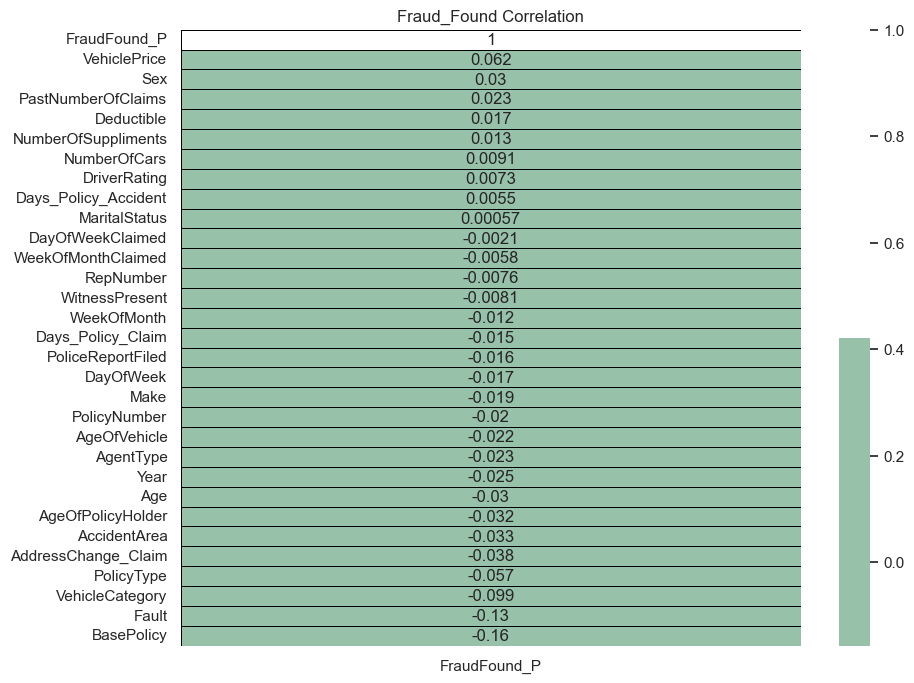

In [40]:
corr=newdf.corrwith(newdf['FraudFound_P']).sort_values(ascending=False).to_frame()
corr.columns = ['FraudFound_P']

plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap=colors,linewidths=0.4,linecolor='black')
plt.title("Fraud_Found Correlation")

In [41]:
#checking if the data is imbalanced
newdf['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

SMOTE

In [26]:
X=newdf.drop("FraudFound_P",axis='columns')
y=newdf['FraudFound_P']

In [27]:
y.value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    14497
1    14497
Name: FraudFound_P, dtype: int64

Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [30]:
y_train.value_counts()

1    11598
0    11597
Name: FraudFound_P, dtype: int64

In [31]:
y_test.value_counts()

0    2900
1    2899
Name: FraudFound_P, dtype: int64

In [32]:
y_train.value_counts()

1    11598
0    11597
Name: FraudFound_P, dtype: int64

MODEL BUILDING

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold,cross_val_score,cross_val_predict,KFold,cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, f1_score, accuracy_score

In [77]:
def model(classifier, X_train, y_train, X_test, y_test):
    sns.set(rc={'figure.figsize': (5, 3)})
    sns.set(style='whitegrid')
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, X_train, y_train).mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    # plot roc_auc curve(classifier,X_test,y_test)
    RocCurveDisplay.from_estimator(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

    model_evaluation(classifier, X_test, y_test)  # Call model_evaluation with the classifier and y_test


def model_evaluation(classifier, X_test, y_test):
    # confusion matrix
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

Decision Tree Classifier

Cross Validation Score:  91.88%
ROC_AUC Score:  91.83%


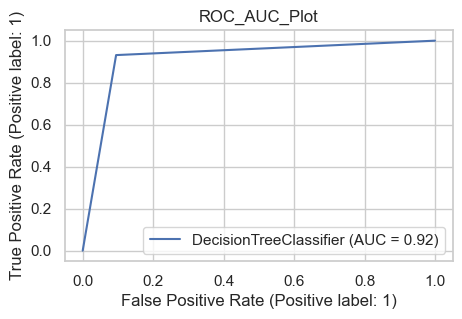

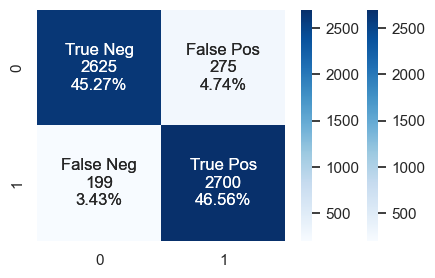

In [78]:
classifier_dtree=DecisionTreeClassifier(random_state=1)

model(classifier_dtree, X_train, y_train, X_test, y_test)
model_evaluation(classifier_dtree,X_test,y_test)

RandomForestClassifier

Cross Validation Score:  95.82%
ROC_AUC Score:  95.91%


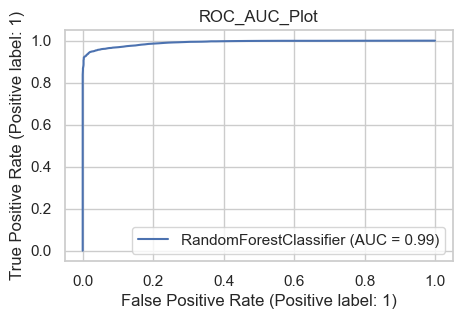

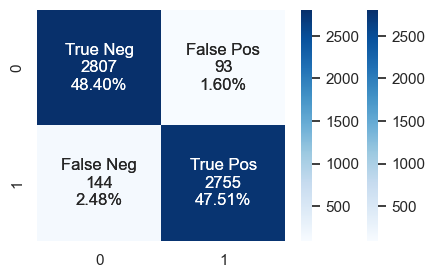

In [79]:
classifier_rdf=RandomForestClassifier(random_state=1)

model(classifier_rdf,X_train,y_train,X_test,y_test)
model_evaluation(classifier_rdf,X_test,y_test)

XGB Boost Classifier

Cross Validation Score:  96.59%
ROC_AUC Score:  96.65%


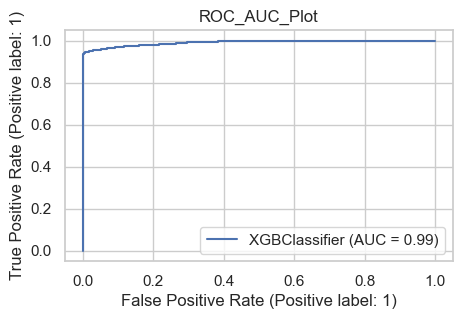

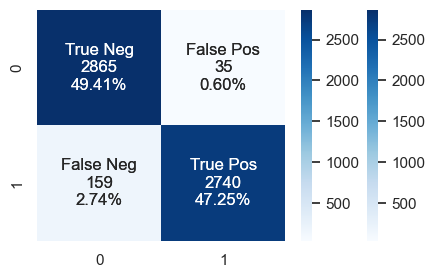

In [80]:
classifier_xgb=XGBClassifier(random_state=1)

model(classifier_xgb, X_train, y_train, X_test, y_test)
model_evaluation(classifier_xgb,X_test,y_test)

LGBM Classifier

Cross Validation Score:  96.49%
ROC_AUC Score:  96.55%


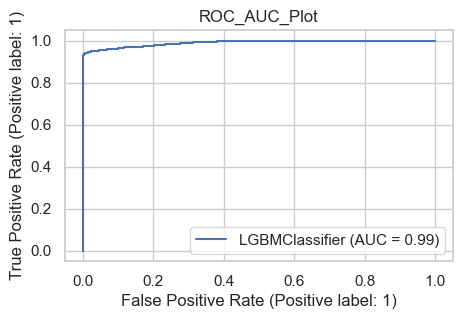

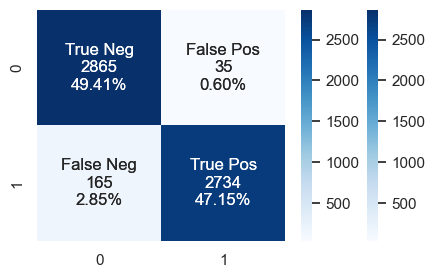

In [81]:
classifier_lgbm=LGBMClassifier(random_state=1)

model(classifier_lgbm, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lgbm,X_test,y_test)

Logistic Regression

Cross Validation Score:  80.90%
ROC_AUC Score:  80.67%


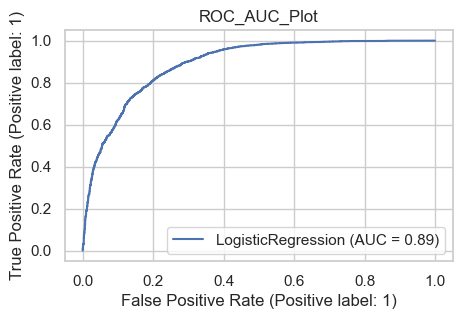

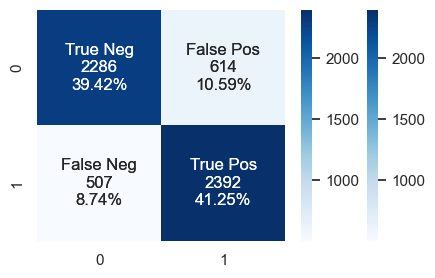

In [82]:
classifier_lr=LogisticRegression(random_state=1)

model(classifier_lr, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr,X_test,y_test)

SVC Classifier

Cross Validation Score:  51.98%
ROC_AUC Score:  51.87%


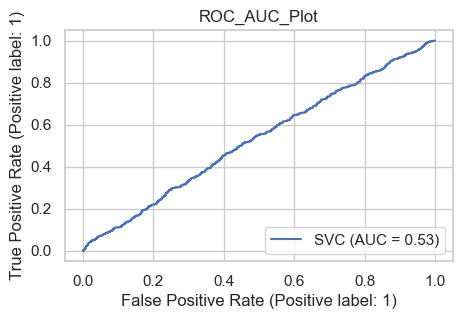

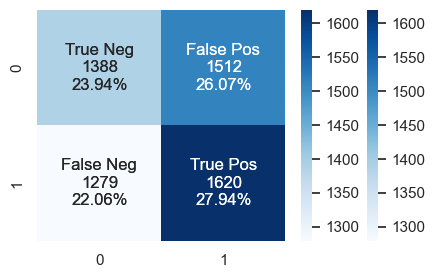

In [83]:
classifier_svc=SVC()

model(classifier_svc, X_train, y_train, X_test, y_test)
model_evaluation(classifier_svc,X_test,y_test)

Hyperparameter Tuning

In [84]:
from flaml import AutoML

automl = AutoML()

settings = {
    "time_budget": 1200,
    "metric": 'roc_auc',
    "task": 'classification',
    "estimator_list": ['lgbm'],
    "seed": 1,
}

automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 05-20 15:15:17] {1693} INFO - task = classification
[flaml.automl.logger: 05-20 15:15:17] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 05-20 15:15:17] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 05-20 15:15:17] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-20 15:15:17] {1911} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 05-20 15:15:17] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-20 15:15:18] {2347} INFO - Estimated sufficient time budget=4596s. Estimated necessary time budget=5s.
[flaml.automl.logger: 05-20 15:15:18] {2394} INFO -  at 0.6s,	estimator lgbm's best error=0.1111,	best estimator lgbm's best error=0.1111
[flaml.automl.logger: 05-20 15:15:18] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-20 15:15:18] {2394} INFO -  at 1.2s,	estimator lgbm's best error=0.1104,	best estimator lgbm's best error=0.1104
[flaml.auto

In [85]:
classifier_lgbm=LGBMClassifier(colsample_bytree=0.8585165147138792,
               learning_rate=0.20230826161808801, max_bin=511,
               min_child_samples=28, n_estimators=750, num_leaves=1129,
               reg_alpha=0.0009765625, reg_lambda=0.2614620175270666,
               verbose=-1)

Cross Validation Score:  96.49%
ROC_AUC Score:  96.55%


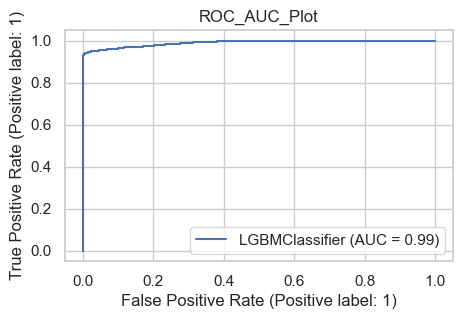

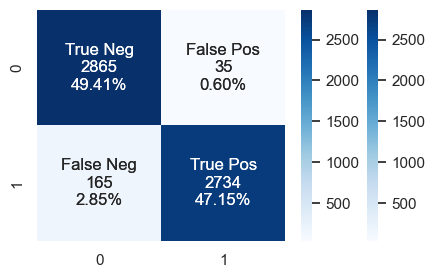

In [86]:
classifier_lgbm=LGBMClassifier(random_state=1)

model(classifier_lgbm, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lgbm,X_test,y_test)